In [41]:
from nltk.corpus import stopwords
import re
import pandas as pd
df = pd.read_csv('paradigms_balanced.csv')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score

In [42]:
df.shape

(310, 2)

In [43]:
df.drop_duplicates(inplace=True)

In [44]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anubh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [45]:
STOPWORDS = set(stopwords.words('english'))

In [46]:
special_character_remover = re.compile('[/(){}\[\]\|@,;]')
extra_symbol_remover = re.compile('[^0-9a-z #+_â€™œ]')
extraWords = ('debate', 'dont', 'arguements', 'round', 'please', 'im', 'arguement', 'make', 'like', 'time', 'good', 'vote', 'want', 'speech', 'think', 'also', 'read', '...', 
'one')
extrawordsTwo = ('judge', 'opponents', 'case', 'need', 'important', 'youre', 'go', 'know', 'well', 'would', 'give', 'get', 'ill', 'something', 'going' , 'high', 'better', 'judging', 'things', 'debates', 'really', 'sure')
extrawordsThree = ('arguments', 'argument', 'win', 'understand', 'debaters', 'teams', 'probably', 'much', 'evaluate', 'way', 'say', 'use', 'try', 'Id', 'even')
extrawordsFour = ('ask', 'questions', 'said', 'feel', 'fine', 'believe', 'speaking', 'speak', 'speeches')
extraWordsFive =('long', 'bad', 'forum', 'still', 'lot', 'must', 'second', 'best', 'wont', 'first')
extraWordsSix=('etc', 'doesnt', 'see', 'unless', 'always', 'however', 'anything')
extraWordsSeven = ('tell', 'reading')
extraWordsEight = ('prefer', 'fun', 'focus', 'school')
cleanWords = ('aff', 'take', 'rounds', 'point', 'take', 'may', 'keep', 'thats', 'since', 'last', 'based', 'generally', 'ive', 'cant', 'people', 'people' ,'makes', 'able', 'pretty', 'isnt', 'usually', 'without', 'end', 'work', 'free', 'likely', 'general', 'though', 'makes', 'without', 'end', 'love', 'possible', 'thats')
cleanWordsTwo = ('mean', 'side', 'less', 'opponent', 'care', 'rather', 'many', 'either', 'default', 'value', 'thing', 'saying', 'stuff', 'tend', 'back', 'start', 'made', 'might', 'start', 'enough', '5', 'actually', 'whatever', 'never', 'expect', 'often', 'let', 'two', 'otherwise', 'used', 'put', 'lose', 'done', 'open', 'else')

In [47]:
def clean_text(text):
    text = text.lower()
    text = special_character_remover.sub(' ', text)
    text = extra_symbol_remover.sub('', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS)
    text = ' '.join(word for word in text.split() if word not in extraWords)
    text = ' '.join(word for word in text.split() if word not in extrawordsTwo)
    text = ' '.join(word for word in text.split() if word not in extrawordsThree)
    text = ' '.join(word for word in text.split() if word not in extrawordsFour)
    text = ' '.join(word for word in text.split() if word not in extraWordsFive)
    text = ' '.join(word for word in text.split() if word not in extraWordsSix)
    text = ' '.join(word for word in text.split() if word not in extraWordsSeven)
    text = ' '.join(word for word in text.split() if word not in extraWordsEight)
    text = ' '.join(word for word in text.split() if word not in cleanWords)    

    return text
    
df['Paradigms'] = df['Paradigms'].apply(clean_text)

In [48]:
print(df['Paradigms'].apply(lambda x: len(x.split(' '))).sum())

48868


In [49]:
from sklearn.model_selection import train_test_split
X = df.Paradigms
y = df.JudgingType
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [50]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((213,), (92,), (213,), (92,))

In [54]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
#from sklearn.linear_model import linearSVC



logistic = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', LogisticRegression()),
              ])
logistic.fit(X_train, y_train)

y_pred = logistic.predict(X_test)

print(f'accuracy {accuracy_score(y_pred,y_test)}')

accuracy 0.7608695652173914


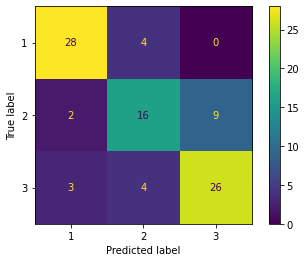

In [55]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(naivebayes, X_test, y_test)  
plt.show()

In [19]:
import joblib
with open('final_model.joblib', 'wb') as f:
    joblib.dump(naivebayes,f)

In [67]:
print(naivebayes.predict(['I am a tech judge', 'flow arguements offense']))

[1 2]


In [114]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
paradigms = df.Paradigms.str.cat(sep=' ')
#function to split text into word
tokens = word_tokenize(paradigms)
vocabulary = set(tokens)
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
print(sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:150])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


7730
['theory', 'flow', 'pf', 'impact', 'weighing', 'team', 'summary', 'policy', 'speaks', 'clear', 'rebuttal', 'weigh', 'k', 'final', 'points', 'email', 'speed', 'framework', 'years', 'cards', 'extend', 'run', 'explain', 'ld', 'link', 'new', 'defense', 'speaker', 'paradigm', 'public', 'ballot', 'chain', 'card', 'ks', 'clearly', 'impacts', 'offense', 'means', 'prep', 'analysis', 'turns', 'fast', 'specific', 'warrant', 'every', 'especially', 'find', 'call', 'everything', 'warrants', 'neg', 'experience', 'look', 'args', 'dropped', 'decision', 'debated', 'affs', 'gmailcom', 'progressive', 'debating', 'activity', 'debater', 'clash', 'cross', 'drop', 'links', 'tech', 'voting', 'plan', 'disclosure', 'crossfire', 'responses', 'paraphrasing', 'resolution', 'reason', 'consider', 'hear', 'coach', 'send', 'least', 'issues', 'doc', 'framing', 'spreading', 'follow', 'true', 'world', 'spread', 'game', 'ff', 'judged', 'issue', 'slow', 'listen', 'cps', 'level', 'line', 'truth', 'university', 'familiar

In [56]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'vect__ngram_range': [(1, 1), (1, 2)],
    'tfidf__use_idf': (True, False),
    'clf__alpha': (1e-2, 1e-3),
}
gs_clf = GridSearchCV(logistic, parameters, cv=5, n_jobs=-1)
gs_clf = gs_clf.fit(X_train, y_train)



ValueError: Invalid parameter alpha for estimator LogisticRegression(). Check the list of available parameters with `estimator.get_params().keys()`.

In [57]:
logistic.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'vect', 'tfidf', 'clf', 'vect__analyzer', 'vect__binary', 'vect__decode_error', 'vect__dtype', 'vect__encoding', 'vect__input', 'vect__lowercase', 'vect__max_df', 'vect__max_features', 'vect__min_df', 'vect__ngram_range', 'vect__preprocessor', 'vect__stop_words', 'vect__strip_accents', 'vect__token_pattern', 'vect__tokenizer', 'vect__vocabulary', 'tfidf__norm', 'tfidf__smooth_idf', 'tfidf__sublinear_tf', 'tfidf__use_idf', 'clf__C', 'clf__class_weight', 'clf__dual', 'clf__fit_intercept', 'clf__intercept_scaling', 'clf__l1_ratio', 'clf__max_iter', 'clf__multi_class', 'clf__n_jobs', 'clf__penalty', 'clf__random_state', 'clf__solver', 'clf__tol', 'clf__verbose', 'clf__warm_start'])